In [ ]:
!wget http://images.cocodataset.org/zips/val2014.zip
!unzip -q val2014.zip -d /content/


--2025-05-02 03:31:53--  http://images.cocodataset.org/zips/val2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 3.5.24.84, 3.5.29.215, 16.15.200.76, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|3.5.24.84|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6645013297 (6.2G) [application/zip]
Saving to: ‘val2014.zip’

val2014.zip         100%[===================>]   6.19G  41.5MB/s    in 2m 47s  

2025-05-02 03:34:41 (37.8 MB/s) - ‘val2014.zip’ saved [6645013297/6645013297]



In [ ]:
import os

image_dir = "/content/val2014"  # Ganti jika lokasi berbeda
image_files = os.listdir(image_dir)

print(f"Jumlah gambar di dalam dataset: {len(image_files)}")


Jumlah gambar di dalam dataset: 40504


✅ Preprocessing selesai! 50 gambar diproses, hasil disimpan di /content/val2014_processed


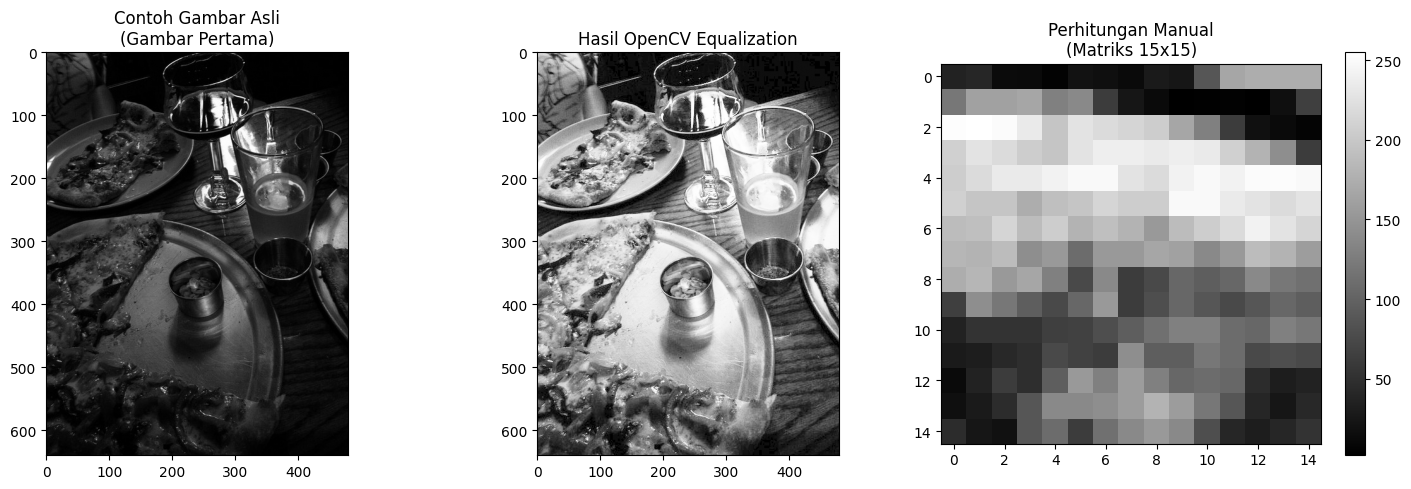


=== MATRIKS ASLI (15x15) ===
    0   1   2   3   4   5   6   7   8   9   10  11  12  13  14
0   39  40  30  28  24  34  31  28  37  36  50  64  65  65  65
1   55  63  63  64  56  57  45  36  28  21  22  23  21  31  46
2   83  86  81  76  70  75  74  73  71  64  56  45  32  28  27
3   72  75  74  71  70  75  77  77  76  77  76  72  66  58  45
4   71  74  76  76  78  79  79  75  74  78  79  78  81  82  79
5   72  70  70  65  69  70  73  71  71  79  79  76  75  74  75
6   68  69  73  68  71  66  69  66  59  68  71  74  78  75  73
7   67  66  68  58  59  53  59  59  64  63  57  59  68  66  61
8   65  67  59  64  56  48  57  45  48  52  51  52  57  55  54
9   46  58  55  51  48  52  59  45  49  52  50  48  50  52  51
10  39  44  44  44  46  47  49  51  54  56  56  53  52  56  55
11  37  38  41  43  48  47  45  58  51  51  55  53  48  49  48
12  28  39  45  43  51  59  56  60  56  52  53  52  42  38  39
13  31  37  42  50  57  57  58  60  66  60  55  50  40  36  41
14  42  36  33  50  53  4

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

# 1. PREPROCESSING BATCH (50 Gambar)
# --------------------------------------------------
target_folder = "/content/val2014"  # Sesuaikan dengan path dataset Anda
image_files = [f for f in os.listdir(target_folder) if f.endswith(('.jpg', '.png'))][:50]  # Ambil 50 gambar pertama
processed_folder = "/content/val2014_processed"
os.makedirs(processed_folder, exist_ok=True)

# Variabel untuk menyimpan contoh gambar
contoh_gambar = None
contoh_image_eq = None

for img_idx, img_name in enumerate(image_files):
    img_path = os.path.join(target_folder, img_name)
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # Preprocessing dengan histogram equalization
    image_eq = cv2.equalizeHist(image)
    cv2.imwrite(os.path.join(processed_folder, img_name), image_eq)

    # Simpan contoh gambar pertama untuk visualisasi
    if img_idx == 0:
        contoh_gambar = image
        contoh_image_eq = image_eq

print(f"✅ Preprocessing selesai! {len(image_files)} gambar diproses, hasil disimpan di {processed_folder}")

# 2. PERHITUNGAN MANUAL (Matriks 15x15 dari Contoh Gambar)
# --------------------------------------------------
def manual_hist_equalization(matrix):
    """Fungsi manual histogram equalization untuk matriks 15x15"""
    # Hitung histogram
    hist = np.zeros(256)
    for row in matrix:
        for pixel in row:
            hist[pixel] += 1

    # Hitung CDF
    cdf = hist.cumsum()

    # Normalisasi CDF
    cdf_normalized = ((cdf - cdf.min()) * 255) / (cdf.max() - cdf.min())

    # Mapping nilai pixel
    equalized_matrix = np.zeros_like(matrix)
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            equalized_matrix[i,j] = cdf_normalized[matrix[i,j]]

    return equalized_matrix.astype(np.uint8)

# Ambil sampel 15x15 dari contoh gambar
sample_matrix = contoh_gambar[:15, :15]
manual_eq_matrix = manual_hist_equalization(sample_matrix)

# Ambil matriks 15x15 dari hasil OpenCV untuk perbandingan
opencv_eq_matrix = contoh_image_eq[:15, :15]

# 3. VISUALISASI HASIL (Contoh Gambar Pertama)
# --------------------------------------------------
plt.figure(figsize=(15, 5))

# Gambar Asli vs Hasil OpenCV
plt.subplot(1, 3, 1)
plt.imshow(contoh_gambar, cmap='gray')
plt.title("Contoh Gambar Asli\n(Gambar Pertama)")

plt.subplot(1, 3, 2)
plt.imshow(contoh_image_eq, cmap='gray')
plt.title("Hasil OpenCV Equalization")

# Matriks 15x15
plt.subplot(1, 3, 3)
plt.imshow(manual_eq_matrix, cmap='gray')
plt.title("Perhitungan Manual\n(Matriks 15x15)")
plt.colorbar()

plt.tight_layout()
plt.show()

# 4. TABEL PERBANDINGAN
# --------------------------------------------------
print("\n=== MATRIKS ASLI (15x15) ===")
print(pd.DataFrame(sample_matrix))

print("\n=== HASIL MANUAL EQUALIZATION ===")
print(pd.DataFrame(manual_eq_matrix))

print("\n=== HASIL OpenCV EQUALIZATION ===")
print(pd.DataFrame(opencv_eq_matrix))

# 5. VERIFIKASI PERBEDAAN
# --------------------------------------------------
diff = np.abs(opencv_eq_matrix - manual_eq_matrix)
print("\n=== PERBEDAAN PIXEL (OpenCV vs Manual) ===")
print(f"Perbedaan maksimal: {diff.max()}")
print(f"Perbedaan rata-rata: {diff.mean():.2f}")

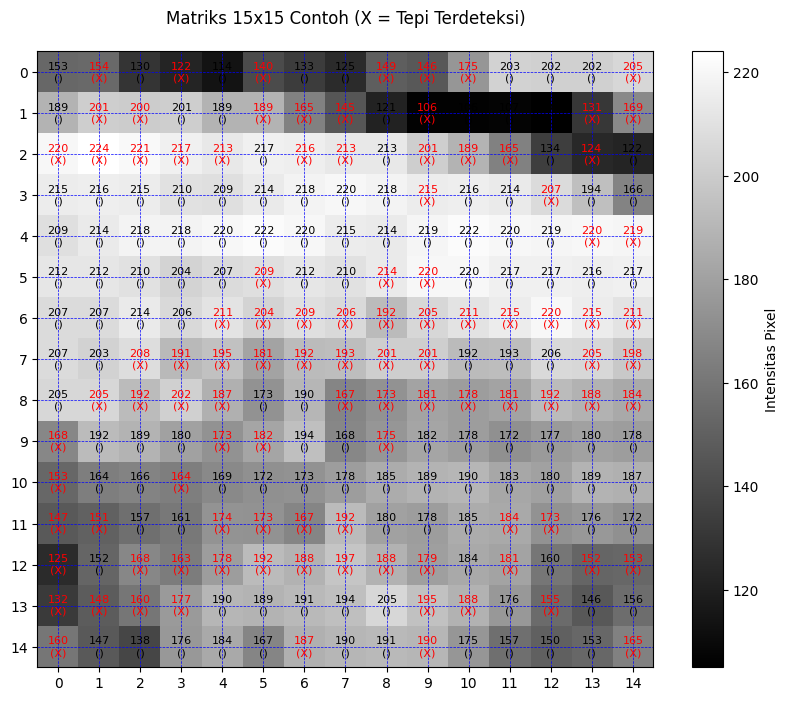

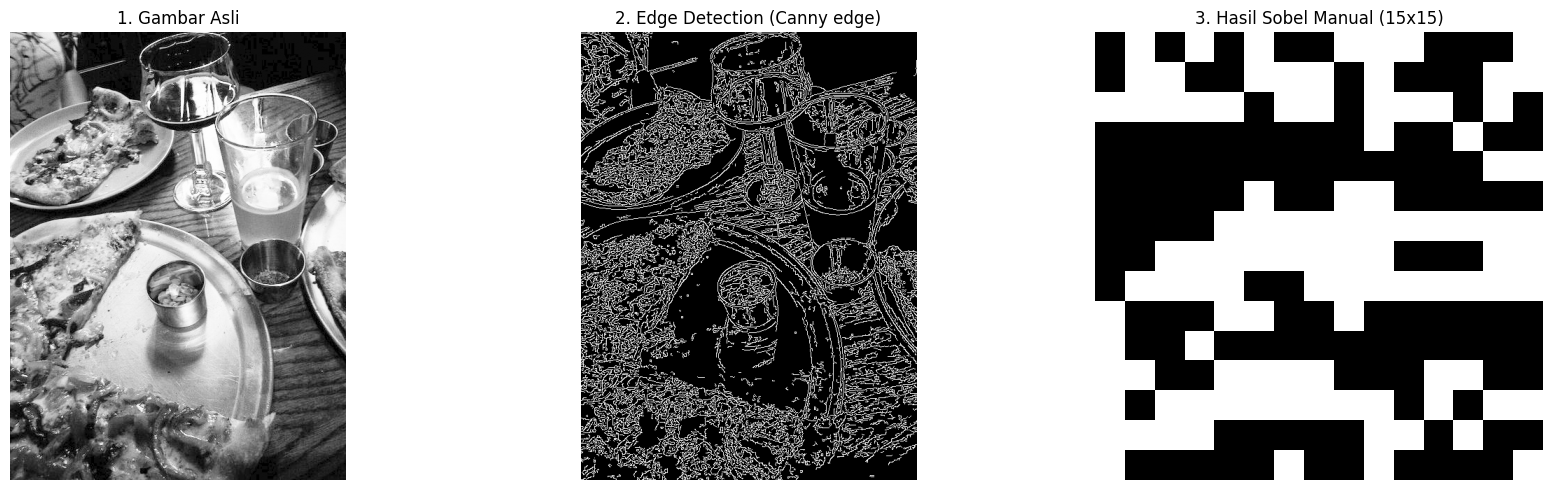


=== TABEL DETEKSI TEPI CONTOH 15x15 ===
+-------------+---------------+--------------+----------+
| Koordinat   |   Nilai Pixel |   Hasil Tepi | Status   |
+=============+===============+==============+==========+
| (0,0)       |           153 |            0 | TIDAK    |
+-------------+---------------+--------------+----------+
| (0,1)       |           154 |          255 | YA       |
+-------------+---------------+--------------+----------+
| (0,2)       |           130 |            0 | TIDAK    |
+-------------+---------------+--------------+----------+
| (0,3)       |           122 |          255 | YA       |
+-------------+---------------+--------------+----------+
| (0,4)       |           114 |            0 | TIDAK    |
+-------------+---------------+--------------+----------+
| (0,5)       |           140 |          255 | YA       |
+-------------+---------------+--------------+----------+
| (0,6)       |           133 |            0 | TIDAK    |
+-------------+---------------+

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from datetime import datetime

# 1. SETUP FOLDER
# ============================================
folder_input = "/content/val2014_processed"
folder_output = "/content/val_edge"
os.makedirs(folder_output, exist_ok=True)  # Buat folder output jika belum ada

# 2. FUNGSI DETEKSI TEPI MANUAL
# ============================================
def deteksi_tepi_manual(matriks):
    """Fungsi deteksi tepi manual dengan operator Sobel"""
    matriks = cv2.normalize(matriks, None, 0, 255, cv2.NORM_MINMAX)
    Gx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    Gy = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    padded = cv2.copyMakeBorder(matriks, 1, 1, 1, 1, cv2.BORDER_REFLECT)
    grad_mag = np.zeros_like(matriks, dtype=np.float32)

    for i in range(matriks.shape[0]):
        for j in range(matriks.shape[1]):
            region = padded[i:i+3, j:j+3]
            dx = np.sum(region * Gx)
            dy = np.sum(region * Gy)
            grad_mag[i,j] = np.sqrt(dx**2 + dy**2)

    _, edges = cv2.threshold(grad_mag.astype(np.uint8), 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    return edges

# 3. PROSES 50 GAMBAR
# ============================================
image_files = [f for f in os.listdir(folder_input) if f.endswith(('.jpg', '.png'))][:50]  # Ambil 50 gambar pertama

# Variabel untuk contoh visualisasi
contoh_gambar = None
contoh_tepi_cv = None
contoh_matriks = None
contoh_tepi_manual = None

for img_idx, img_name in enumerate(image_files):
    # Baca gambar
    img_path = os.path.join(folder_input, img_name)
    gambar = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    if gambar is None:
        print(f"Gagal memuat gambar: {img_name}")
        continue

    if gambar.shape[0] < 15 or gambar.shape[1] < 15:
        print(f"Gambar terlalu kecil: {img_name}")
        continue

    # Deteksi tepi dengan Canny
    def auto_canny(gambar, sigma=0.33):
        v = np.median(gambar)
        lower = int(max(0, (1.0 - sigma) * v))
        upper = int(min(255, (1.0 + sigma) * v))
        return cv2.Canny(gambar, lower, upper)

    tepi_cv = auto_canny(gambar)

    # Simpan hasil
    output_path = os.path.join(folder_output, img_name)
    cv2.imwrite(output_path, tepi_cv)

    # Simpan contoh dari gambar pertama
    if img_idx == 0:
        contoh_gambar = gambar
        contoh_tepi_cv = tepi_cv
        contoh_matriks = gambar[:15, :15]
        contoh_tepi_manual = deteksi_tepi_manual(contoh_matriks)

# 4. VISUALISASI CONTOH (GAMBAR PERTAMA)
# ============================================
if contoh_gambar is not None:
    # Visualisasi matriks 15x15
    plt.figure(figsize=(10,8))
    plt.imshow(contoh_matriks, cmap='gray')
    for i in range(15):
        for j in range(15):
            plt.text(j, i, f"{contoh_matriks[i,j]}\n({'X' if contoh_tepi_manual[i,j]==255 else ''})",
                    ha='center', va='center',
                    color='red' if contoh_tepi_manual[i,j]==255 else 'black',
                    fontsize=8)
    plt.title("Matriks 15x15 Contoh (X = Tepi Terdeteksi)", pad=20)
    plt.xticks(range(15))
    plt.yticks(range(15))
    plt.colorbar(label='Intensitas Pixel')
    plt.grid(True, color='blue', linestyle='--', linewidth=0.5)
    plt.show()

    # Perbandingan metode
    plt.figure(figsize=(18, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(contoh_gambar, cmap='gray')
    plt.title("1. Gambar Asli", fontsize=12)
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(contoh_tepi_cv, cmap='gray')
    plt.title("2. Edge Detection (Canny edge)", fontsize=12)
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(contoh_tepi_manual, cmap='gray')
    plt.title("3. Hasil Sobel Manual (15x15)", fontsize=12)
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Tabel hasil
    df_hasil = pd.DataFrame({
        'Koordinat': [f"({i},{j})" for i in range(15) for j in range(15)],
        'Nilai Pixel': contoh_matriks.flatten(),
        'Hasil Tepi': contoh_tepi_manual.flatten(),
        'Status': ['YA' if x == 255 else 'TIDAK' for x in contoh_tepi_manual.flatten()]
    })

    print("\n=== TABEL DETEKSI TEPI CONTOH 15x15 ===")
    print(df_hasil.head(15).to_markdown(index=False, tablefmt="grid"))

print(f"\n✅ Proses selesai! {len(image_files)} gambar diproses dan disimpan di {folder_output}")

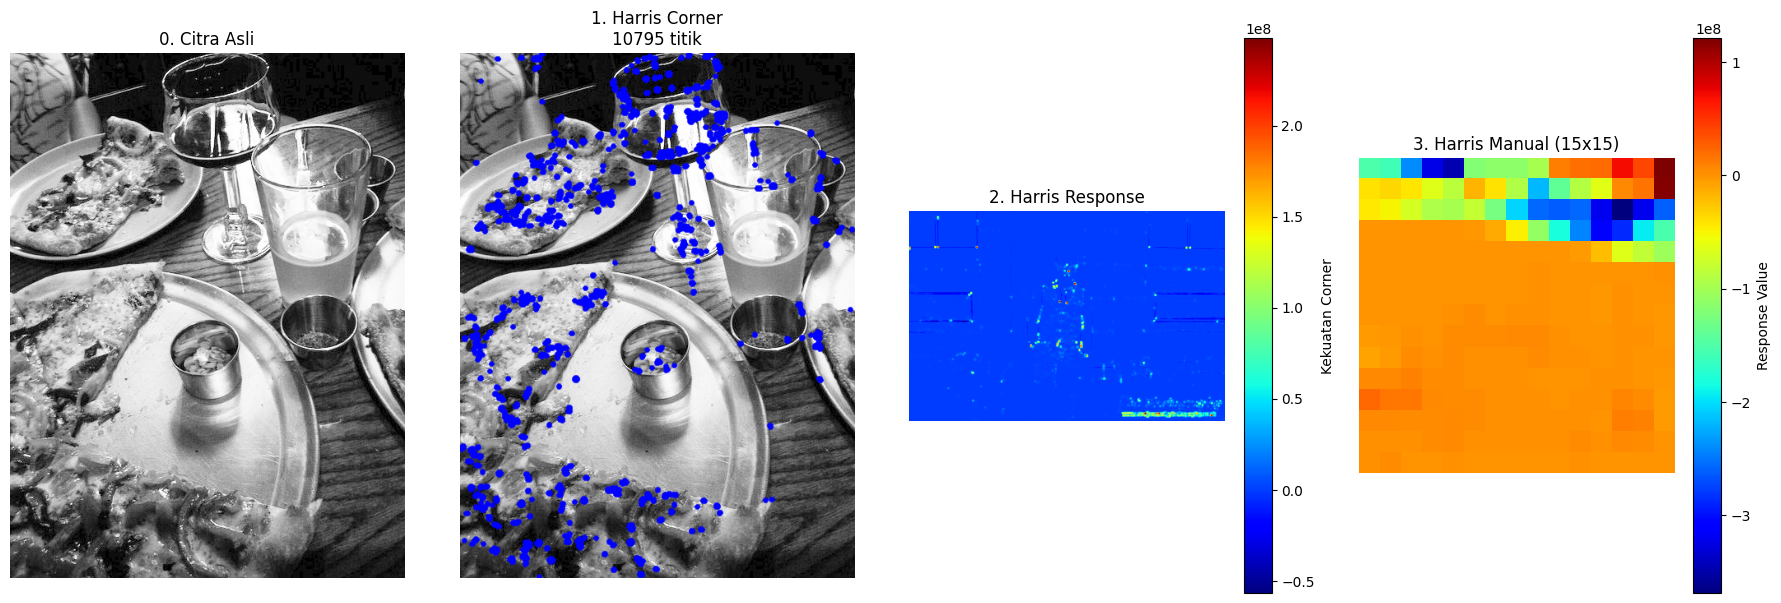

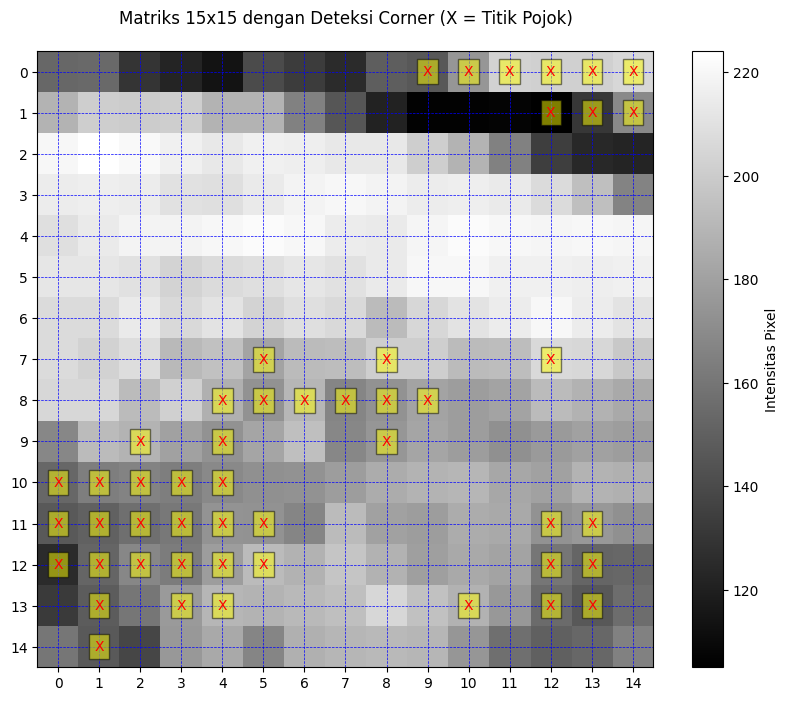


=== TABEL HARRIS CORNER 15x15 (Contoh) ===
Threshold: 2424888.55
+-------------+---------------+-------------------+---------+
| Koordinat   |   Nilai Pixel |   Harris Response | Pojok   |
+=============+===============+===================+=========+
| (0,0)       |           153 |      -1.51184e+08 | TIDAK   |
+-------------+---------------+-------------------+---------+
| (0,1)       |           154 |      -1.59903e+08 | TIDAK   |
+-------------+---------------+-------------------+---------+
| (0,2)       |           130 |      -2.39592e+08 | TIDAK   |
+-------------+---------------+-------------------+---------+
| (0,3)       |           122 |      -3.23657e+08 | TIDAK   |
+-------------+---------------+-------------------+---------+
| (0,4)       |           114 |      -3.46432e+08 | TIDAK   |
+-------------+---------------+-------------------+---------+
| (0,5)       |           140 |      -1.18598e+08 | TIDAK   |
+-------------+---------------+-------------------+---------+
| (0

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

# 1. SETUP FOLDER
# ============================================
folder_processed = "/content/val2014_processed"  # Folder hasil preprocessing
folder_harris = "/content/val_harris"  # Folder output Harris
os.makedirs(folder_harris, exist_ok=True)

# 2. PROSES HARRIS CORNER PADA GAMBAR PROCESSED
# ============================================
file_gambar = [f for f in os.listdir(folder_processed) if f.endswith(('.jpg','.png'))][:50]  # Ambil 50 gambar pertama

# Variabel untuk contoh visualisasi
contoh_gambar = None
keypoints = []  # Untuk menyimpan titik corner
contoh_matriks = None
contoh_titik_pojok = None

for idx, nama_file in enumerate(file_gambar):
    # Baca gambar HASIL PREPROCESSING
    path_gambar = os.path.join(folder_processed, nama_file)
    img_processed = cv2.imread(path_gambar, cv2.IMREAD_GRAYSCALE)

    if img_processed is None:
        print(f"Gagal memuat gambar: {nama_file}")
        continue

    # Harris Corner Parameters yang Dioptimasi
    blockSize = 3  # Diubah dari 2 ke 3 untuk neighborhood lebih besar
    ksize = 3      # Ukuran kernel Sobel tetap sama
    k = 0.05       # Diubah dari 0.04 ke 0.05 untuk sensitivitas lebih baik

    # Normalisasi gambar untuk meningkatkan kontras
    img_processed = cv2.normalize(img_processed, None, 0, 255, cv2.NORM_MINMAX)

    # Deteksi Harris Corner
    harris = cv2.cornerHarris(img_processed.astype(np.float32), blockSize, ksize, k)

    # Dilasi untuk meningkatkan deteksi corner
    harris = cv2.dilate(harris, None)

    # Thresholding untuk mendapatkan titik corner
    threshold = 0.02 * harris.max()  # Diubah dari 0.01 ke 0.02

    # PERUBAHAN: Buat gambar output berwarna (BGR) dari gambar grayscale
    img_output = cv2.cvtColor(img_processed, cv2.COLOR_GRAY2BGR)

    # PERUBAHAN: Tandai corner dengan warna biru (B=255, G=0, R=0)
    img_output[harris > threshold] = [255, 0, 0]  # Warna biru untuk corner

    # Simpan hasil dengan corner berwarna biru
    cv2.imwrite(os.path.join(folder_harris, nama_file), img_output)

    # Simpan contoh dari gambar pertama
    if idx == 0:
        contoh_gambar = img_processed.copy()

        # Dapatkan koordinat titik corner
        y, x = np.where(harris > threshold)
        keypoints = [cv2.KeyPoint(float(x[i]), float(y[i]), 3) for i in range(len(x))]

        # PERUBAHAN: Gambar dengan titik-titik corner berwarna biru
        img_with_corners = cv2.drawKeypoints(
            cv2.cvtColor(img_processed, cv2.COLOR_GRAY2BGR),
            keypoints,
            None,
            color=(255, 0, 0),  # Warna biru (B,G,R)
            flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
        )

        contoh_matriks = img_processed[:15, :15]

        # Deteksi corner manual pada matriks 15x15
        def harris_manual(matriks):
            Ix = cv2.Sobel(matriks, cv2.CV_64F, 1, 0, ksize=3)
            Iy = cv2.Sobel(matriks, cv2.CV_64F, 0, 1, ksize=3)

            Ix2 = Ix**2
            Iy2 = Iy**2
            Ixy = Ix*Iy

            Sx2 = cv2.boxFilter(Ix2, -1, (3,3))
            Sy2 = cv2.boxFilter(Iy2, -1, (3,3))
            Sxy = cv2.boxFilter(Ixy, -1, (3,3))

            det = Sx2*Sy2 - Sxy**2
            trace = Sx2 + Sy2
            return det - k*(trace**2)

        contoh_titik_pojok = harris_manual(contoh_matriks)

# 3. VISUALISASI CONTOH (GAMBAR PERTAMA)
# ============================================
if contoh_gambar is not None:
    plt.figure(figsize=(18, 6))

    # Gambar asli
    plt.subplot(1, 4, 1)
    plt.imshow(contoh_gambar, cmap='gray')
    plt.title("0. Citra Asli", fontsize=12)
    plt.axis('off')

    # PERUBAHAN: Gambar processed dengan titik corner biru
    plt.subplot(1, 4, 2)
    plt.imshow(cv2.cvtColor(img_with_corners, cv2.COLOR_BGR2RGB))
    plt.title(f"1. Harris Corner\n{len(keypoints)} titik", fontsize=12)
    plt.axis('off')

    # Hasil Harris OpenCV (heatmap)
    plt.subplot(1, 4, 3)
    plt.imshow(harris, cmap='jet')  # Gunakan harris langsung, bukan normalized
    plt.title("2. Harris Response", fontsize=12)
    plt.colorbar(label='Kekuatan Corner')
    plt.axis('off')

    # Hasil Harris Manual 15x15
    plt.subplot(1, 4, 4)
    plt.imshow(contoh_titik_pojok, cmap='jet')
    plt.title("3. Harris Manual (15x15)", fontsize=12)
    plt.colorbar(label='Response Value')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Visualisasi Matriks 15x15 dengan Titik Pojok
    plt.figure(figsize=(10,8))
    plt.imshow(contoh_matriks, cmap='gray')

    # Tandai titik pojok (threshold 2% dari max)
    threshold_manual = 0.02 * contoh_titik_pojok.max()
    for i in range(15):
        for j in range(15):
            if contoh_titik_pojok[i,j] > threshold_manual:
                plt.text(j, i, "X",
                        ha='center', va='center',
                        color='red', fontsize=10,
                        bbox=dict(facecolor='yellow', alpha=0.5))

    plt.title("Matriks 15x15 dengan Deteksi Corner (X = Titik Pojok)", pad=20)
    plt.xticks(range(15))
    plt.yticks(range(15))
    plt.colorbar(label='Intensitas Pixel')
    plt.grid(color='blue', linestyle='--', linewidth=0.5)
    plt.show()

    # Tabel Nilai Harris Response
    df_harris = pd.DataFrame({
        'Koordinat': [f"({i},{j})" for i in range(15) for j in range(15)],
        'Nilai Pixel': contoh_matriks.flatten(),
        'Harris Response': contoh_titik_pojok.flatten(),
        'Pojok': ['YA' if x > threshold_manual else 'TIDAK' for x in contoh_titik_pojok.flatten()]
    })

    print("\n=== TABEL HARRIS CORNER 15x15 (Contoh) ===")
    print(f"Threshold: {threshold_manual:.2f}")
    print(df_harris.head(15).to_markdown(index=False, tablefmt="grid"))

print(f"\n✅ Proses selesai! {len(file_gambar)} gambar diproses dan disimpan di {folder_harris}")

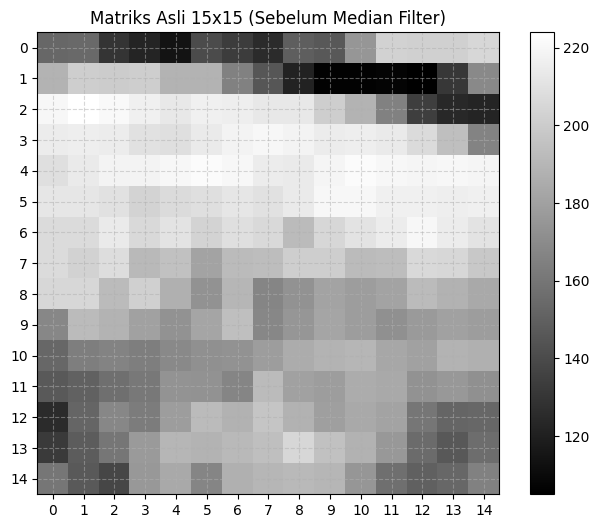


=== Nilai Pixel Matriks Asli (5x5 Pertama) ===
+---------+---------+---------+---------+---------+
|   Col 0 |   Col 1 |   Col 2 |   Col 3 |   Col 4 |
+=========+=========+=========+=========+=========+
|     153 |     154 |     130 |     122 |     114 |
+---------+---------+---------+---------+---------+
|     189 |     201 |     200 |     201 |     189 |
+---------+---------+---------+---------+---------+
|     220 |     224 |     221 |     217 |     213 |
+---------+---------+---------+---------+---------+
|     215 |     216 |     215 |     210 |     209 |
+---------+---------+---------+---------+---------+
|     209 |     214 |     218 |     218 |     220 |
+---------+---------+---------+---------+---------+


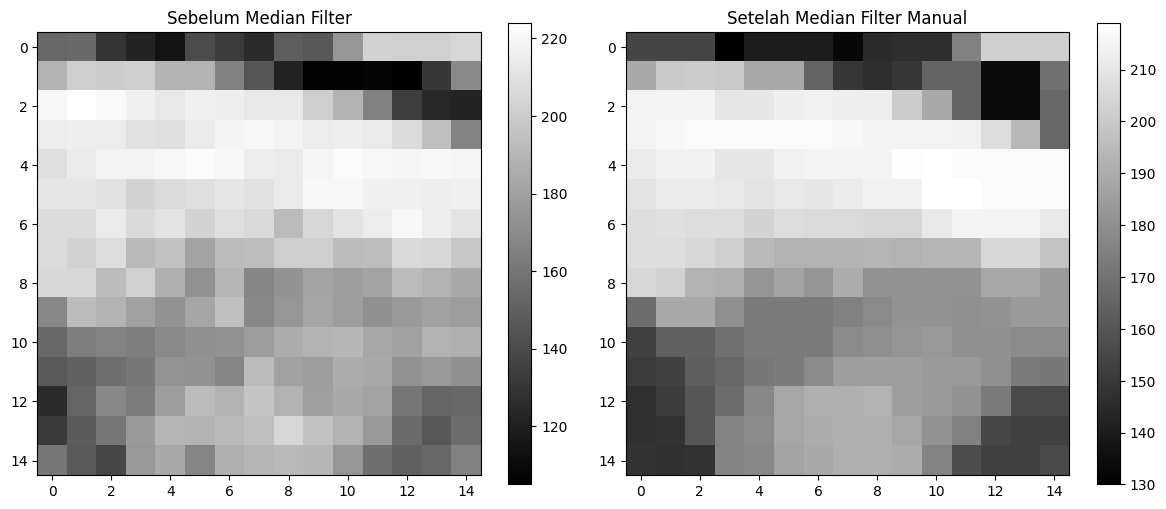


=== Hasil Median Filter Manual (5x5 Pertama) ===
+---------+---------+---------+---------+---------+
|   Col 0 |   Col 1 |   Col 2 |   Col 3 |   Col 4 |
+=========+=========+=========+=========+=========+
|     154 |     154 |     154 |     130 |     140 |
+---------+---------+---------+---------+---------+
|     189 |     200 |     201 |     200 |     189 |
+---------+---------+---------+---------+---------+
|     215 |     215 |     215 |     210 |     210 |
+---------+---------+---------+---------+---------+
|     215 |     216 |     217 |     217 |     217 |
+---------+---------+---------+---------+---------+
|     212 |     214 |     214 |     210 |     210 |
+---------+---------+---------+---------+---------+

=== Contoh Perhitungan untuk 1 Pixel ===
Lokasi Pixel: (Row 7, Col 7)

Neighborhood 3x3:
+-----+-----+-----+
| 209 | 206 | 192 |
+-----+-----+-----+
| 192 | 193 | 201 |
+-----+-----+-----+
| 190 | 167 | 173 |
+-----+-----+-----+

Nilai yang diurutkan: [167 173 190 192 192 

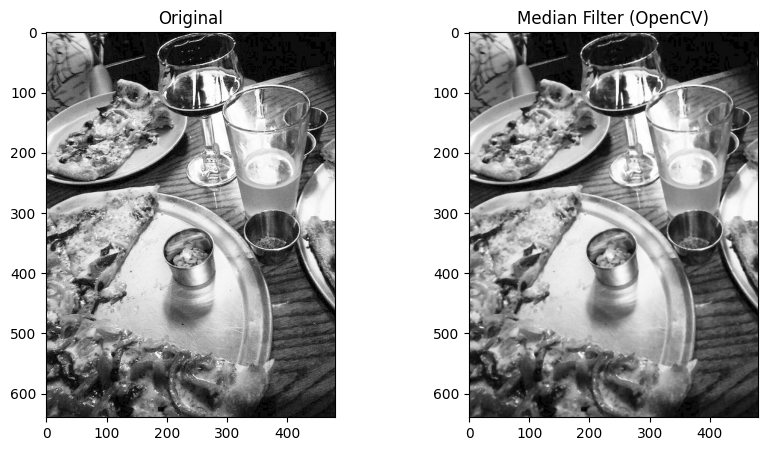

✅ Median Filter selesai! Hasil disimpan di: /content/val_median


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from tabulate import tabulate

# Setup folder
folder_processed = "/content/val2014_processed"
folder_median = "/content/val_median"  # Folder khusus hasil Median
os.makedirs(folder_median, exist_ok=True)

# Ambil 50 gambar pertama
file_gambar = [f for f in os.listdir(folder_processed) if f.endswith(('.jpg','.png'))][:50]

# Fungsi untuk menampilkan matriks dengan format rapi
def print_matrix(matrix, title):
    print(f"\n=== {title} ===")
    print(tabulate(matrix[:5, :5], tablefmt="grid", headers=[f"Col {i}" for i in range(5)]))

# Proses Median Filter dan simpan
for idx, nama_file in enumerate(file_gambar):
    path_gambar = os.path.join(folder_processed, nama_file)
    img = cv2.imread(path_gambar, cv2.IMREAD_GRAYSCALE)

    if img is None:
        print(f"Gagal memuat gambar: {nama_file}")
        continue

    # Median Filter (3x3)
    median_cv = cv2.medianBlur(img, 3)
    cv2.imwrite(os.path.join(folder_median, nama_file), median_cv)

    # Hanya proses visualisasi untuk gambar pertama
    if idx == 0:
        # Ambil matriks 15x15 dari gambar asli
        matriks_asli = img[:15, :15]

        # 1. Visualisasi Matriks Asli
        plt.figure(figsize=(8, 6))
        plt.imshow(matriks_asli, cmap='gray')
        plt.title("Matriks Asli 15x15 (Sebelum Median Filter)")
        plt.colorbar()
        plt.xticks(range(15))
        plt.yticks(range(15))
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.show()

        print_matrix(matriks_asli, "Nilai Pixel Matriks Asli (5x5 Pertama)")

        # 2. Proses Median Filter Manual
        def median_filter_manual(matriks):
            padded = np.pad(matriks, 1, mode='edge')
            result = np.zeros_like(matriks)
            for i in range(matriks.shape[0]):
                for j in range(matriks.shape[1]):
                    neighborhood = padded[i:i+3, j:j+3]
                    result[i,j] = np.median(neighborhood)
            return result

        matriks_median_manual = median_filter_manual(matriks_asli)

        # Visualisasi Hasil Median Manual
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.imshow(matriks_asli, cmap='gray')
        plt.title("Sebelum Median Filter")
        plt.colorbar()

        plt.subplot(1, 2, 2)
        plt.imshow(matriks_median_manual, cmap='gray')
        plt.title("Setelah Median Filter Manual")
        plt.colorbar()

        plt.tight_layout()
        plt.show()

        print_matrix(matriks_median_manual, "Hasil Median Filter Manual (5x5 Pertama)")

        # 3. Contoh Perhitungan untuk 1 Pixel (Pixel di tengah)
        contoh_pixel = (7, 7)  # Pilih pixel di tengah matriks
        neighborhood = np.pad(matriks_asli, 1, mode='edge')[contoh_pixel[0]:contoh_pixel[0]+3,
                                                          contoh_pixel[1]:contoh_pixel[1]+3]

        print("\n=== Contoh Perhitungan untuk 1 Pixel ===")
        print(f"Lokasi Pixel: (Row {contoh_pixel[0]}, Col {contoh_pixel[1]})")
        print("\nNeighborhood 3x3:")
        print(tabulate(neighborhood, tablefmt="grid"))
        print(f"\nNilai yang diurutkan: {np.sort(neighborhood.flatten())}")
        print(f"Nilai Median: {np.median(neighborhood)}")

# Visualisasi perbandingan gambar utuh
if len(file_gambar) > 0:
    contoh_asli = cv2.imread(os.path.join(folder_processed, file_gambar[0]), cv2.IMREAD_GRAYSCALE)
    contoh_median = cv2.imread(os.path.join(folder_median, file_gambar[0]), cv2.IMREAD_GRAYSCALE)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1), plt.imshow(contoh_asli, cmap='gray'), plt.title('Original')
    plt.subplot(1, 2, 2), plt.imshow(contoh_median, cmap='gray'), plt.title('Median Filter (OpenCV)')
    plt.show()

print(f"✅ Median Filter selesai! Hasil disimpan di: {folder_median}")

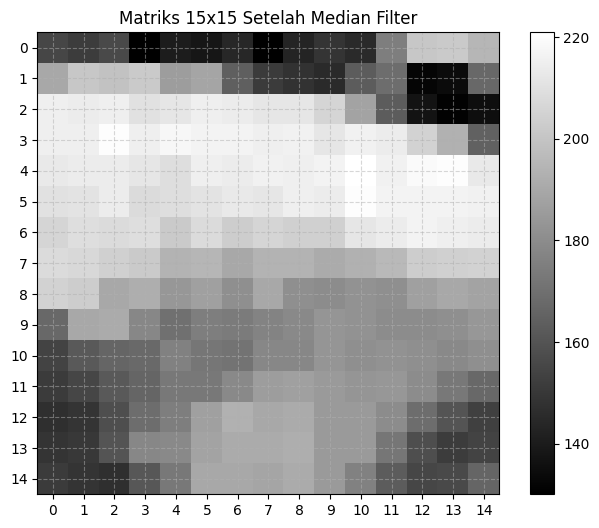


=== Nilai Pixel Setelah Median (5x5 Pertama) ===
+---------+---------+---------+---------+---------+
|   Col 0 |   Col 1 |   Col 2 |   Col 3 |   Col 4 |
+=========+=========+=========+=========+=========+
|   155.0 |   152.0 |   156.0 |   130.0 |   140.0 |
+---------+---------+---------+---------+---------+
|   190.0 |   201.0 |   199.0 |   202.0 |   186.0 |
+---------+---------+---------+---------+---------+
|   215.0 |   214.0 |   215.0 |   210.0 |   212.0 |
+---------+---------+---------+---------+---------+
|   215.0 |   215.0 |   220.0 |   215.0 |   218.0 |
+---------+---------+---------+---------+---------+
|   213.0 |   214.0 |   214.0 |   212.0 |   209.0 |
+---------+---------+---------+---------+---------+


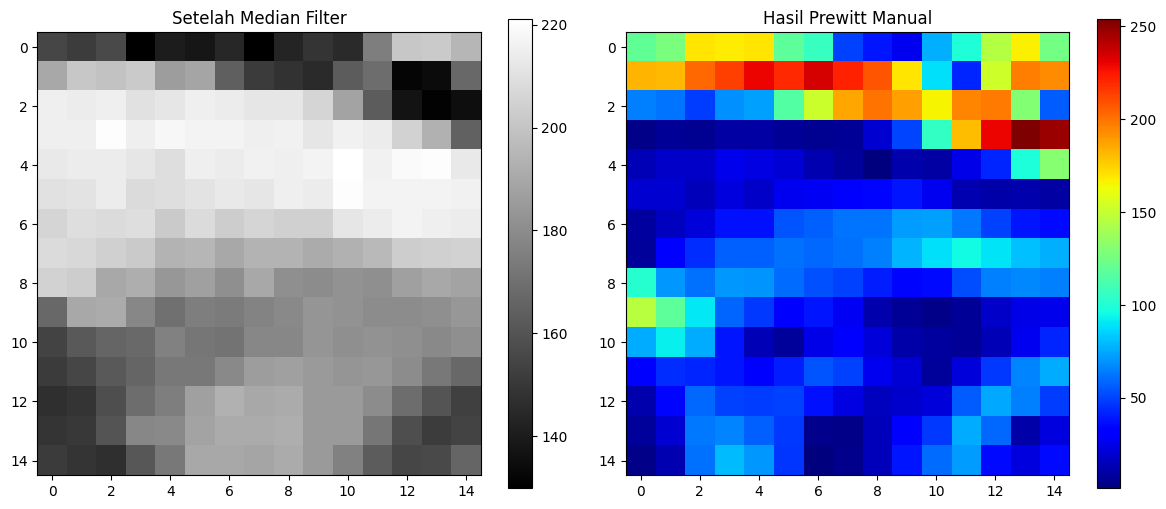


=== Hasil Prewitt Manual (5x5 Pertama) ===
+---------+---------+---------+---------+---------+
|   Col 0 |   Col 1 |   Col 2 |   Col 3 |   Col 4 |
+=========+=========+=========+=========+=========+
|   119.1 |   127.5 |   169.5 |   167.2 |   169.0 |
+---------+---------+---------+---------+---------+
|   182.1 |   181.3 |   202.5 |   213.4 |   229.0 |
+---------+---------+---------+---------+---------+
|    64.8 |    61.6 |    48.1 |    68.4 |    73.2 |
+---------+---------+---------+---------+---------+
|     4.0 |     6.7 |     6.1 |    10.2 |    10.0 |
+---------+---------+---------+---------+---------+
|    14.1 |    18.0 |    17.7 |    25.1 |    23.4 |
+---------+---------+---------+---------+---------+

=== Contoh Perhitungan untuk 1 Pixel ===
Lokasi Pixel: (Row 7, Col 7)

Neighborhood 3x3:
+-----+-----+-----+
| 203 | 206 | 204 |
+-----+-----+-----+
| 190 | 194 | 194 |
+-----+-----+-----+
| 181 | 190 | 181 |
+-----+-----+-----+

Gx (Horizontal Gradient): 5.0
Gy (Vertical Gradie

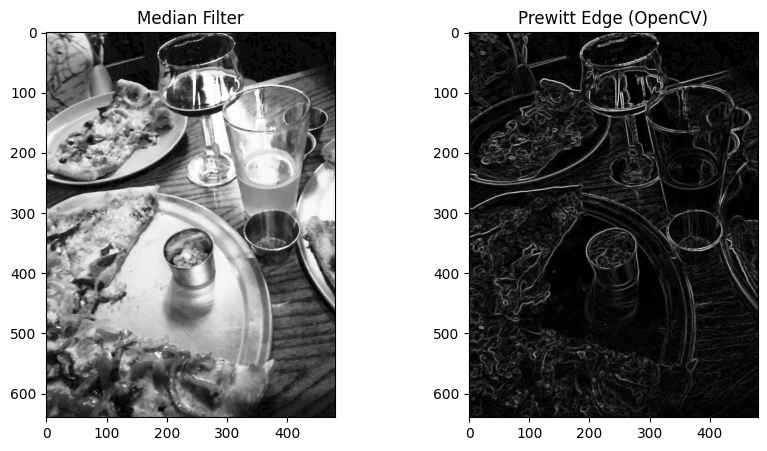

✅ Prewitt selesai! Hasil disimpan di: /content/val_prewitt


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from tabulate import tabulate

# Setup folder
folder_median = "/content/val_median"
folder_prewitt = "/content/val_prewitt"
os.makedirs(folder_prewitt, exist_ok=True)

# Kernel Prewitt
prewitt_x_kernel = np.array([[-1, 0, 1],
                           [-1, 0, 1],
                           [-1, 0, 1]])
prewitt_y_kernel = np.array([[-1, -1, -1],
                           [0, 0, 0],
                           [1, 1, 1]])

# Fungsi untuk menampilkan matriks dengan format rapi
def print_matrix(matrix, title):
    print(f"\n=== {title} ===")
    print(tabulate(matrix[:5, :5], tablefmt="grid", floatfmt=".1f", headers=[f"Col {i}" for i in range(5)]))

# Ambil 50 gambar pertama
file_gambar = [f for f in os.listdir(folder_median) if f.endswith(('.jpg','.png'))][:50]

# Proses Prewitt dan simpan
for idx, nama_file in enumerate(file_gambar):
    path_gambar = os.path.join(folder_median, nama_file)
    img = cv2.imread(path_gambar, cv2.IMREAD_GRAYSCALE)

    if img is None:
        print(f"Gagal memuat gambar: {nama_file}")
        continue

    # Prewitt Edge Detection
    prewitt_x = cv2.filter2D(img, cv2.CV_64F, prewitt_x_kernel)
    prewitt_y = cv2.filter2D(img, cv2.CV_64F, prewitt_y_kernel)
    prewitt_combined = np.sqrt(prewitt_x**2 + prewitt_y**2)
    prewitt_normalized = cv2.normalize(prewitt_combined, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    cv2.imwrite(os.path.join(folder_prewitt, nama_file), prewitt_normalized)

    # Hanya proses visualisasi untuk gambar pertama
    if idx == 0:
        # Ambil matriks 15x15 dari gambar median
        matriks_median = img[:15, :15]

        # 1. Visualisasi Matriks Median Filter
        plt.figure(figsize=(8, 6))
        plt.imshow(matriks_median, cmap='gray')
        plt.title("Matriks 15x15 Setelah Median Filter")
        plt.colorbar()
        plt.xticks(range(15))
        plt.yticks(range(15))
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.show()

        print_matrix(matriks_median, "Nilai Pixel Setelah Median (5x5 Pertama)")

        # 2. Proses Prewitt Manual
        def prewitt_manual(matriks):
            padded = np.pad(matriks, 1, mode='edge')
            prewitt_x = np.zeros_like(matriks, dtype=np.float64)
            prewitt_y = np.zeros_like(matriks, dtype=np.float64)

            for i in range(matriks.shape[0]):
                for j in range(matriks.shape[1]):
                    neighborhood = padded[i:i+3, j:j+3]
                    prewitt_x[i,j] = np.sum(neighborhood * prewitt_x_kernel)
                    prewitt_y[i,j] = np.sum(neighborhood * prewitt_y_kernel)

            return np.sqrt(prewitt_x**2 + prewitt_y**2)

        matriks_prewitt_manual = prewitt_manual(matriks_median)

        # Visualisasi Hasil Prewitt Manual
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.imshow(matriks_median, cmap='gray')
        plt.title("Setelah Median Filter")
        plt.colorbar()

        plt.subplot(1, 2, 2)
        plt.imshow(matriks_prewitt_manual, cmap='jet')
        plt.title("Hasil Prewitt Manual")
        plt.colorbar()

        plt.tight_layout()
        plt.show()

        print_matrix(matriks_prewitt_manual, "Hasil Prewitt Manual (5x5 Pertama)")

        # 3. Contoh Perhitungan untuk 1 Pixel
        contoh_pixel = (7, 7)  # Pilih pixel di tengah matriks
        neighborhood = np.pad(matriks_median, 1, mode='edge')[contoh_pixel[0]:contoh_pixel[0]+3,
                                                           contoh_pixel[1]:contoh_pixel[1]+3]

        # Hitung komponen X dan Y
        Gx = np.sum(neighborhood * prewitt_x_kernel)
        Gy = np.sum(neighborhood * prewitt_y_kernel)
        G = np.sqrt(Gx**2 + Gy**2)

        print("\n=== Contoh Perhitungan untuk 1 Pixel ===")
        print(f"Lokasi Pixel: (Row {contoh_pixel[0]}, Col {contoh_pixel[1]})")
        print("\nNeighborhood 3x3:")
        print(tabulate(neighborhood, tablefmt="grid", floatfmt=".0f"))
        print(f"\nGx (Horizontal Gradient): {Gx:.1f}")
        print(f"Gy (Vertical Gradient): {Gy:.1f}")
        print(f"G (Magnitude): {G:.1f}")

# Visualisasi perbandingan gambar utuh
if len(file_gambar) > 0:
    contoh_median = cv2.imread(os.path.join(folder_median, file_gambar[0]), cv2.IMREAD_GRAYSCALE)
    contoh_prewitt = cv2.imread(os.path.join(folder_prewitt, file_gambar[0]), cv2.IMREAD_GRAYSCALE)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1), plt.imshow(contoh_median, cmap='gray'), plt.title('Median Filter')
    plt.subplot(1, 2, 2), plt.imshow(contoh_prewitt, cmap='gray'), plt.title('Prewitt Edge (OpenCV)')
    plt.show()

print(f"✅ Prewitt selesai! Hasil disimpan di: {folder_prewitt}")

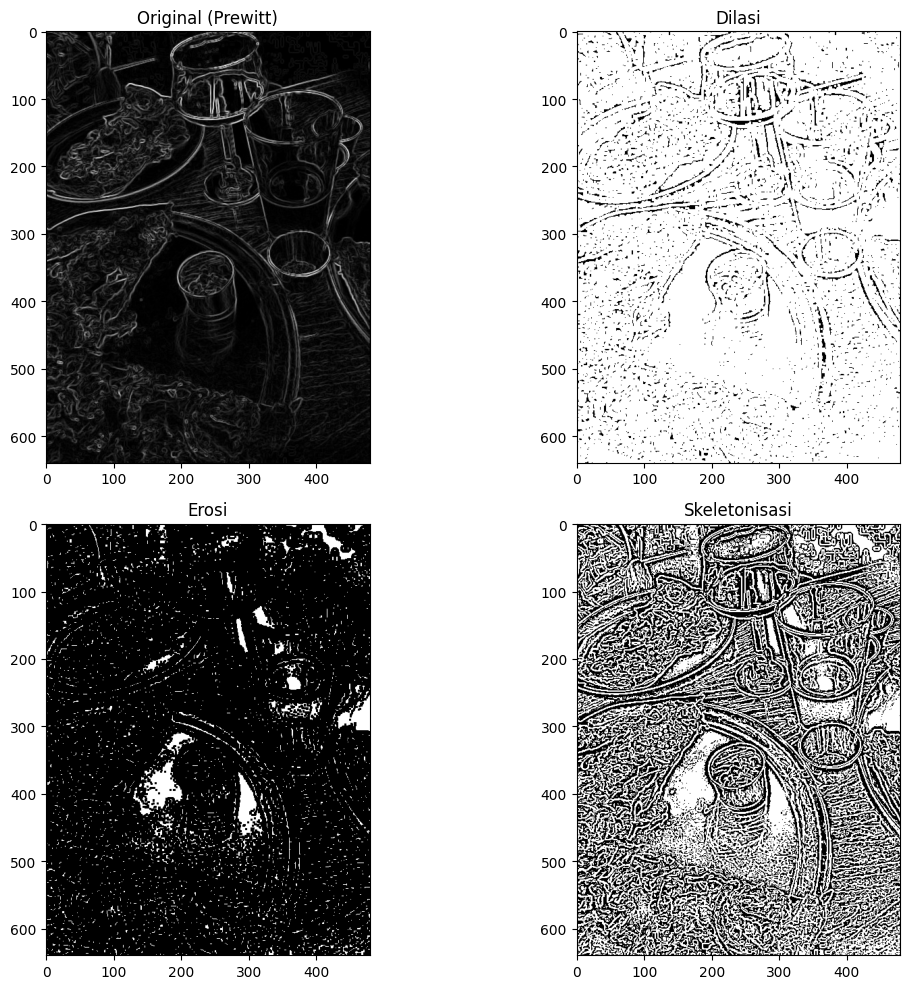


🔍 DETAIL PERHITUNGAN MATRIKS 15x15:

=== MATRIKS ASLI (NILAI PIXEL) ===
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   0 |   0 |   0 |   0 |   0 |   0 | 255 |   0 |   0 |   0 |   0 |   0 |   0 |   0 |   0 |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
| 255 | 255 | 255 | 255 | 255 | 255 | 255 | 255 | 255 | 255 | 255 |   0 | 255 | 255 | 255 |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
| 255 | 255 |   0 | 255 | 255 | 255 | 255 | 255 | 255 | 255 | 255 | 255 | 255 | 255 |   0 |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   0 |   0 |   0 |   0 |   0 |   0 |   0 |   0 |   0 |   0 | 255 | 255 | 255 | 255 | 255 |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   0 |   0 |   0 |   0 |   0 |   0 |   0 |   0 |   0 |   0 |   0 |   0 |   0 | 255 | 255 |
+-----+

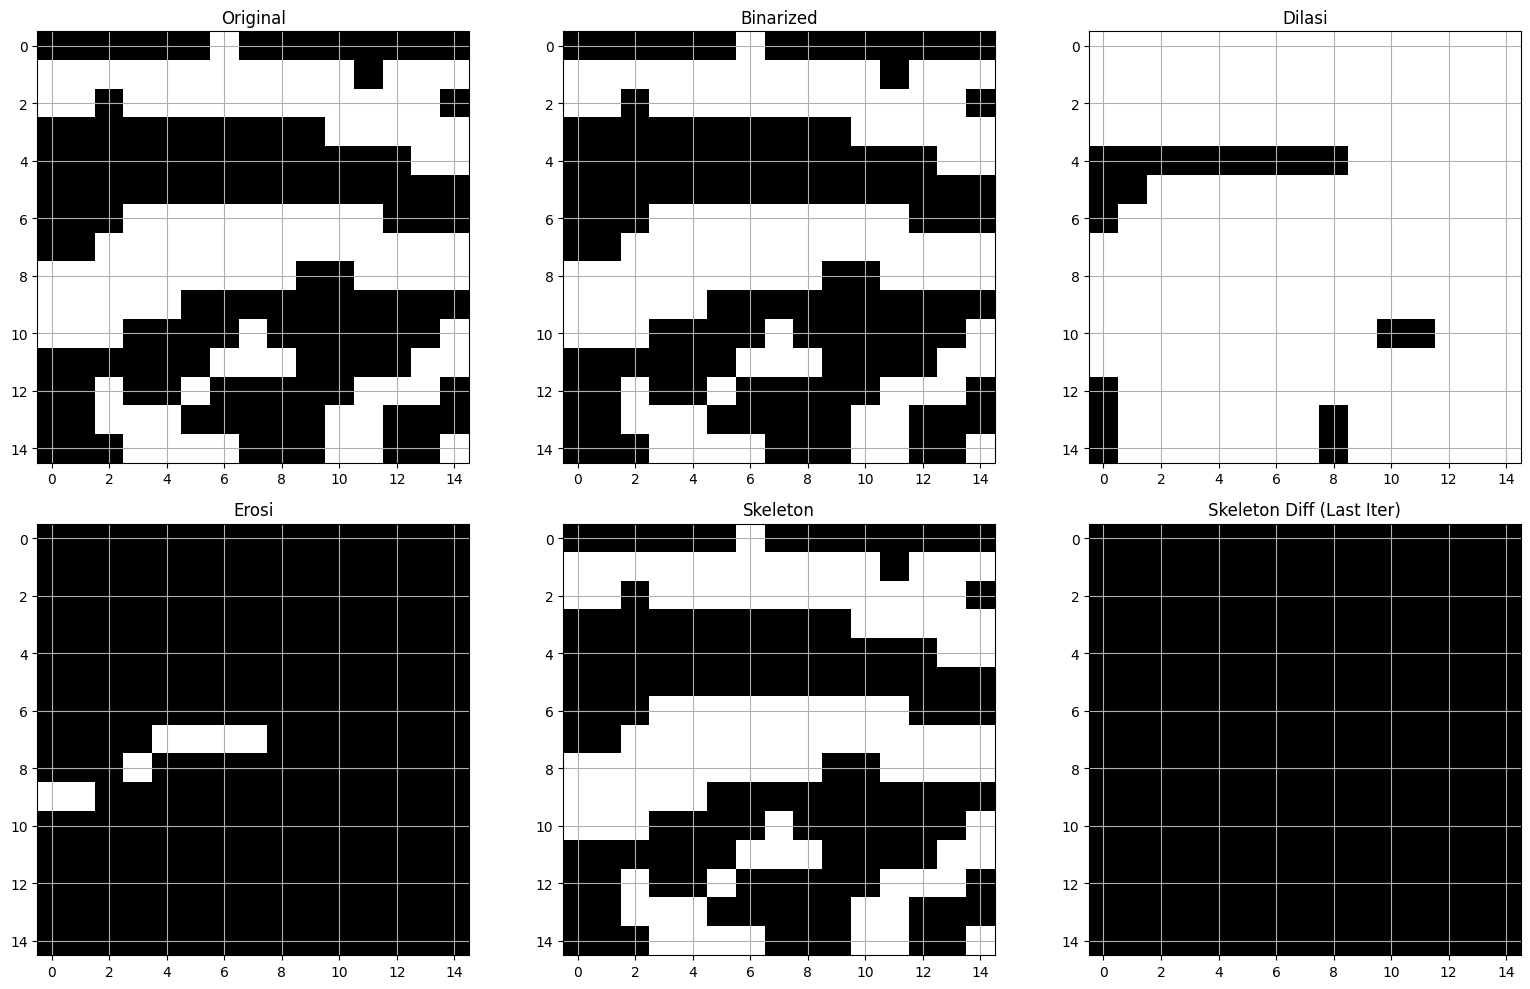

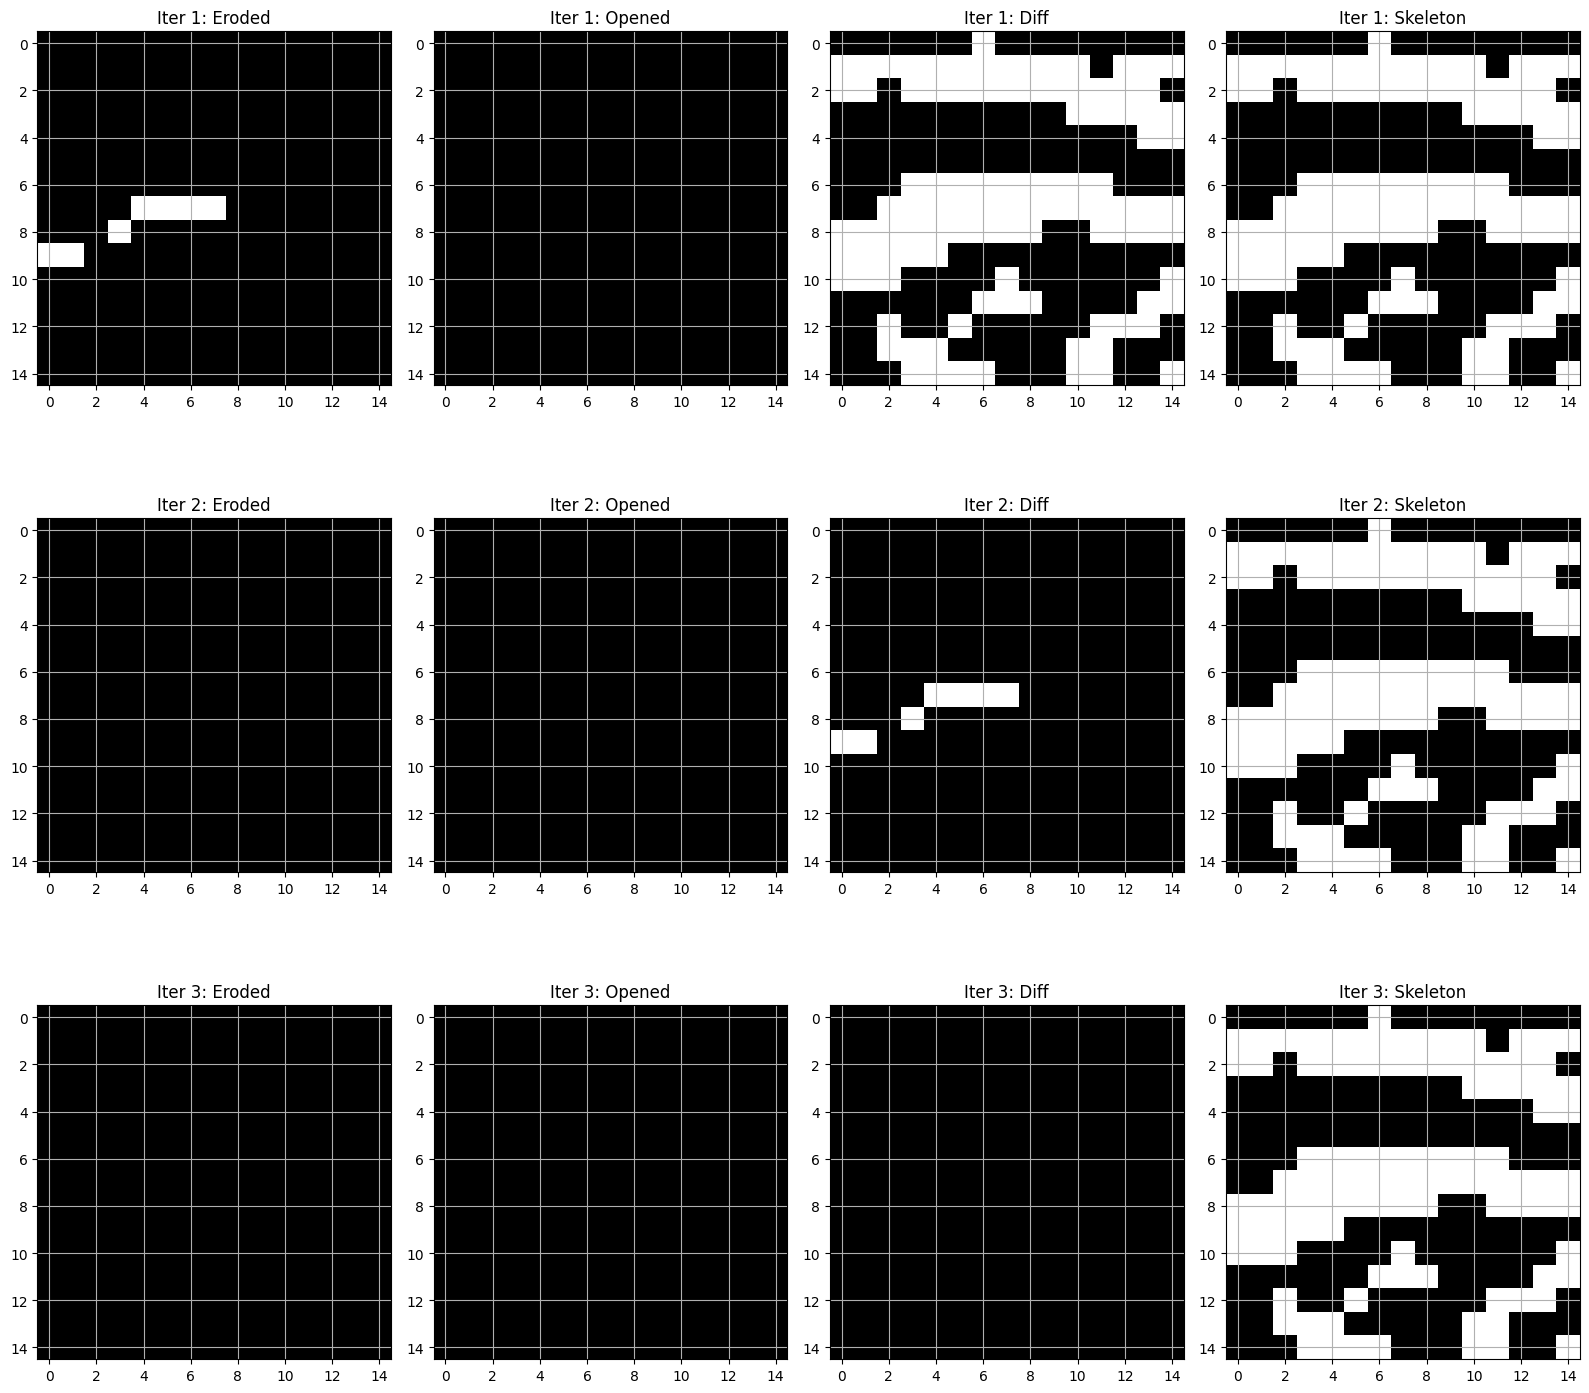


✅ Hasil morfologi disimpan di: /content/val_morphology(erosi,dilasi)
✅ Hasil skeleton disimpan di: /content/val_skeleton


In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from tabulate import tabulate

# Setup folder
input_folder = "/content/val_prewitt"
morphology_folder = "/content/val_morphology(erosi,dilasi)"
skeleton_folder = "/content/val_skeleton"
os.makedirs(morphology_folder, exist_ok=True)
os.makedirs(skeleton_folder, exist_ok=True)

# Daftar file gambar
image_files = [f for f in os.listdir(input_folder) if f.endswith(('.jpg','.png'))][:50]

# Variabel untuk contoh visualisasi
selected_original = None
selected_dilated = None
selected_eroded = None
selected_skeleton = None
sample_matrix = None

## FUNGSI UTILITY ##
def print_matrix(matrix, title):
    """Mencetak matriks dengan format tabel"""
    print(f"\n=== {title} ===")
    print(tabulate(matrix, tablefmt="grid", stralign="center"))

def visualize_operations(original, op1, op2, op3, titles):
    """Visualisasi 4 operasi dalam 2x2 grid"""
    fig, ax = plt.subplots(2, 2, figsize=(12, 10))
    ax[0,0].imshow(original, cmap='gray'), ax[0,0].set_title(titles[0])
    ax[0,1].imshow(op1, cmap='gray'), ax[0,1].set_title(titles[1])
    ax[1,0].imshow(op2, cmap='gray'), ax[1,0].set_title(titles[2])
    ax[1,1].imshow(op3, cmap='gray'), ax[1,1].set_title(titles[3])
    plt.tight_layout()
    plt.show()

## PROSES UTAMA ##
for img_name in image_files:
    img_path = os.path.join(input_folder, img_name)

    # Baca gambar
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"⚠️ Gagal membaca {img_name}")
        continue

    # PERUBAHAN 1: Binarisasi gambar terlebih dahulu dengan adaptif thresholding
    # Hal ini memastikan bahwa tepi-tepi terdeteksi dengan jelas untuk operasi morfologi
    # _, binary_image = cv2.threshold(image, 30, 255, cv2.THRESH_BINARY)
    binary_image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                      cv2.THRESH_BINARY, 11, 2)

    # PERUBAHAN 2: Gunakan kernel yang lebih kecil untuk erosi (3x3 bukan 5x5)
    kernel = np.ones((3,3), np.uint8)

    # 1. Operasi Dasar Morfologi
    dilated = cv2.dilate(binary_image, kernel, iterations=1)
    eroded = cv2.erode(binary_image, kernel, iterations=1)

    # 2. Skeletonisasi
    skeleton = np.zeros(binary_image.shape, np.uint8)
    element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
    temp = binary_image.copy()

    while cv2.countNonZero(temp) > 0:
        eroded_temp = cv2.erode(temp, element)
        opened = cv2.morphologyEx(eroded_temp, cv2.MORPH_OPEN, element)
        skel_diff = cv2.subtract(temp, opened)
        skeleton = cv2.bitwise_or(skeleton, skel_diff)
        temp = eroded_temp.copy()

        # Batasi iterasi untuk menghindari loop terlalu lama
        if cv2.countNonZero(eroded_temp) < 10:
            break

    # Simpan hasil
    cv2.imwrite(os.path.join(morphology_folder, f"dilated_{img_name}"), dilated)
    cv2.imwrite(os.path.join(morphology_folder, f"eroded_{img_name}"), eroded)
    cv2.imwrite(os.path.join(skeleton_folder, f"skeleton_{img_name}"), skeleton)

    # Simpan contoh untuk visualisasi
    if selected_original is None:
        selected_original = image
        selected_dilated = dilated
        selected_eroded = eroded
        selected_skeleton = skeleton
        sample_matrix = binary_image[:15, :15]  # Ambil matriks 15x15 dari gambar biner

## VISUALISASI HASIL ##
if selected_original is not None:
    # 1. Visualisasi Operasi Utama
    visualize_operations(
        selected_original, selected_dilated, selected_eroded, selected_skeleton,
        ["Original (Prewitt)", "Dilasi", "Erosi", "Skeletonisasi"]
    )

    # 2. Visualisasi Matriks 15x15
    kernel_3x3 = np.ones((3,3), np.uint8)

    # Visualisasi binarisasi pada sampel matriks
    _, binary_sample = cv2.threshold(sample_matrix, 127, 255, cv2.THRESH_BINARY)

    # Hitung manual operasi pada matriks kecil
    manual_dilated = cv2.dilate(binary_sample, kernel_3x3)
    manual_eroded = cv2.erode(binary_sample, kernel_3x3)

    # TAMBAHAN: Visualisasi perhitungan erosi dan dilasi
    # Untuk setiap pixel di matriks, tunjukkan bagaimana erosi/dilasi dikalkulasi
    def explain_erosion(matrix, kernel_size=3):
        """Penjelasan proses erosi untuk ukuran matriks kecil"""
        height, width = matrix.shape
        result = np.zeros_like(matrix)
        pad = kernel_size // 2

        # Padding matriks
        padded = np.pad(matrix, pad, mode='constant', constant_values=0)

        # Detail kalkulasi
        calculations = []

        for i in range(height):
            for j in range(width):
                # Ambil patch 3x3 dari padded matrix
                patch = padded[i:i+kernel_size, j:j+kernel_size]

                # Erosi: jika semua nilai dalam patch = 255, output=255, selainnya=0
                eroded_value = 255 if np.all(patch == 255) else 0
                result[i, j] = eroded_value

                # Simpan detail kalkulasi untuk beberapa contoh
                if i < 5 and j < 5:  # Batasi jumlah entri
                    calculations.append({
                        'position': f"({i},{j})",
                        'patch': patch.tolist(),
                        'all_255': np.all(patch == 255),
                        'result': eroded_value
                    })

        return result, calculations

    def explain_dilation(matrix, kernel_size=3):
        """Penjelasan proses dilasi untuk ukuran matriks kecil"""
        height, width = matrix.shape
        result = np.zeros_like(matrix)
        pad = kernel_size // 2

        # Padding matriks
        padded = np.pad(matrix, pad, mode='constant', constant_values=0)

        # Detail kalkulasi
        calculations = []

        for i in range(height):
            for j in range(width):
                # Ambil patch 3x3 dari padded matrix
                patch = padded[i:i+kernel_size, j:j+kernel_size]

                # Dilasi: jika ada nilai dalam patch = 255, output=255, selainnya=0
                dilated_value = 255 if np.any(patch == 255) else 0
                result[i, j] = dilated_value

                # Simpan detail kalkulasi untuk beberapa contoh
                if i < 5 and j < 5:  # Batasi jumlah entri
                    calculations.append({
                        'position': f"({i},{j})",
                        'patch': patch.tolist(),
                        'any_255': np.any(patch == 255),
                        'result': dilated_value
                    })

        return result, calculations

    # Jalankan kalkulasi eksplisit
    manual_eroded_detailed, erode_details = explain_erosion(binary_sample)
    manual_dilated_detailed, dilate_details = explain_dilation(binary_sample)

    # Skeletonisasi manual (versi sederhana)
    manual_skeleton = np.zeros(binary_sample.shape, np.uint8)
    temp_matrix = binary_sample.copy()

    skeleton_steps = []

    for iter_num in range(3):  # Iterasi dibatasi untuk matriks kecil
        eroded_matrix = cv2.erode(temp_matrix, kernel_3x3)
        opened_matrix = cv2.morphologyEx(eroded_matrix, cv2.MORPH_OPEN, kernel_3x3)
        skel_diff = cv2.subtract(temp_matrix, opened_matrix)
        prev_skeleton = manual_skeleton.copy()
        manual_skeleton = cv2.bitwise_or(manual_skeleton, skel_diff)

        # Simpan langkah skeletonisasi
        skeleton_steps.append({
            'iteration': iter_num + 1,
            'eroded': eroded_matrix.copy(),
            'opened': opened_matrix.copy(),
            'diff': skel_diff.copy(),
            'skeleton': manual_skeleton.copy()
        })

        temp_matrix = eroded_matrix.copy()

    # Tampilkan matriks
    print("\n🔍 DETAIL PERHITUNGAN MATRIKS 15x15:")
    print_matrix(sample_matrix, "MATRIKS ASLI (NILAI PIXEL)")
    print_matrix(binary_sample, "MATRIKS BINER (THRESHOLDING)")
    print_matrix(manual_dilated, "HASIL DILASI (3x3 Kernel)")
    print_matrix(manual_eroded, "HASIL EROSI (3x3 Kernel)")
    print_matrix(manual_skeleton, "HASIL SKELETONISASI (3 Iterasi)")

    # Tampilkan detail erosi & dilasi
    print("\n📊 PENJELASAN EROSI (CONTOH 5 PIXEL PERTAMA):")
    for detail in erode_details[:5]:
        print(f"\nPixel {detail['position']}:")
        print("3x3 Patch:")
        print(np.array(detail['patch']))
        print(f"Semua pixel = 255? {detail['all_255']}")
        print(f"Hasil: {detail['result']}")

    print("\n📊 PENJELASAN DILASI (CONTOH 5 PIXEL PERTAMA):")
    for detail in dilate_details[:5]:
        print(f"\nPixel {detail['position']}:")
        print("3x3 Patch:")
        print(np.array(detail['patch']))
        print(f"Ada pixel = 255? {detail['any_255']}")
        print(f"Hasil: {detail['result']}")

    # Visualisasi steps skeletonisasi
    print("\n📊 LANGKAH SKELETONISASI:")
    for step in skeleton_steps:
        print(f"\nIterasi {step['iteration']}:")
        print("1. Hasil Erosi:")
        print_matrix(step['eroded'], f"EROSI (Iterasi {step['iteration']})")
        print("2. Hasil Opening:")
        print_matrix(step['opened'], f"OPENING (Iterasi {step['iteration']})")
        print("3. Perbedaan (Original - Opening):")
        print_matrix(step['diff'], f"DIFF (Iterasi {step['iteration']})")
        print("4. Skeleton sejauh ini:")
        print_matrix(step['skeleton'], f"SKELETON (Iterasi {step['iteration']})")

    # Visualisasi matriks
    fig, ax = plt.subplots(2, 3, figsize=(16, 10))
    ax[0,0].imshow(sample_matrix, cmap='gray'), ax[0,0].set_title("Original")
    ax[0,1].imshow(binary_sample, cmap='gray'), ax[0,1].set_title("Binarized")
    ax[0,2].imshow(manual_dilated, cmap='gray'), ax[0,2].set_title("Dilasi")
    ax[1,0].imshow(manual_eroded, cmap='gray'), ax[1,0].set_title("Erosi")
    ax[1,1].imshow(manual_skeleton, cmap='gray'), ax[1,1].set_title("Skeleton")

    # Tampilkan juga visualisasi setiap langkah skeletonisasi
    if skeleton_steps:
        ax[1,2].imshow(skeleton_steps[-1]['diff'], cmap='gray')
        ax[1,2].set_title("Skeleton Diff (Last Iter)")

    for a in ax.flatten():
        a.grid(True)

    plt.tight_layout()
    plt.show()

    # Visualisasi langkah-langkah skeletonisasi
    if skeleton_steps:
        fig, ax = plt.subplots(len(skeleton_steps), 4, figsize=(16, 5*len(skeleton_steps)))

        for i, step in enumerate(skeleton_steps):
            ax[i,0].imshow(step['eroded'], cmap='gray')
            ax[i,0].set_title(f"Iter {i+1}: Eroded")
            ax[i,0].grid(True)

            ax[i,1].imshow(step['opened'], cmap='gray')
            ax[i,1].set_title(f"Iter {i+1}: Opened")
            ax[i,1].grid(True)

            ax[i,2].imshow(step['diff'], cmap='gray')
            ax[i,2].set_title(f"Iter {i+1}: Diff")
            ax[i,2].grid(True)

            ax[i,3].imshow(step['skeleton'], cmap='gray')
            ax[i,3].set_title(f"Iter {i+1}: Skeleton")
            ax[i,3].grid(True)

        plt.tight_layout()
        plt.show()

print(f"\n✅ Hasil morfologi disimpan di: {morphology_folder}")
print(f"✅ Hasil skeleton disimpan di: {skeleton_folder}")

Ukuran gambar berbeda: (500, 375) vs (480, 640)
Melakukan resize gambar untuk keseragaman...


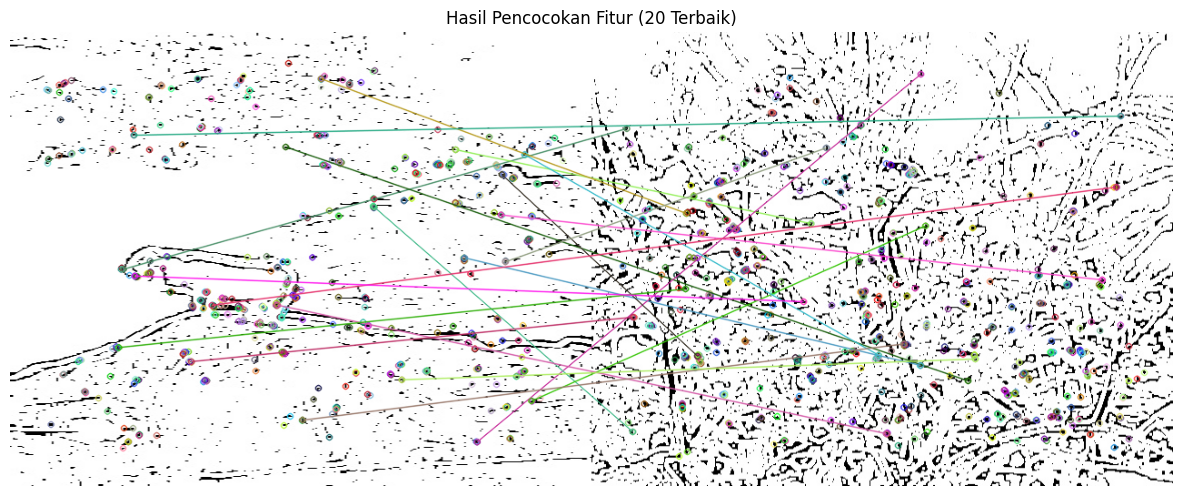


=== INFO Pencocokan ===
Total Match: 189
5 Match Terbaik:
Match 1: Distance=55.0, Idx1=343, Idx2=194
Match 2: Distance=56.0, Idx1=94, Idx2=141
Match 3: Distance=56.0, Idx1=101, Idx2=140
Match 4: Distance=56.0, Idx1=374, Idx2=4
Match 5: Distance=57.0, Idx1=150, Idx2=43

Keypoints pada matriks 15x15 diperbesar untuk Gambar 1: 10
Keypoints pada matriks 15x15 diperbesar untuk Gambar 2: 0


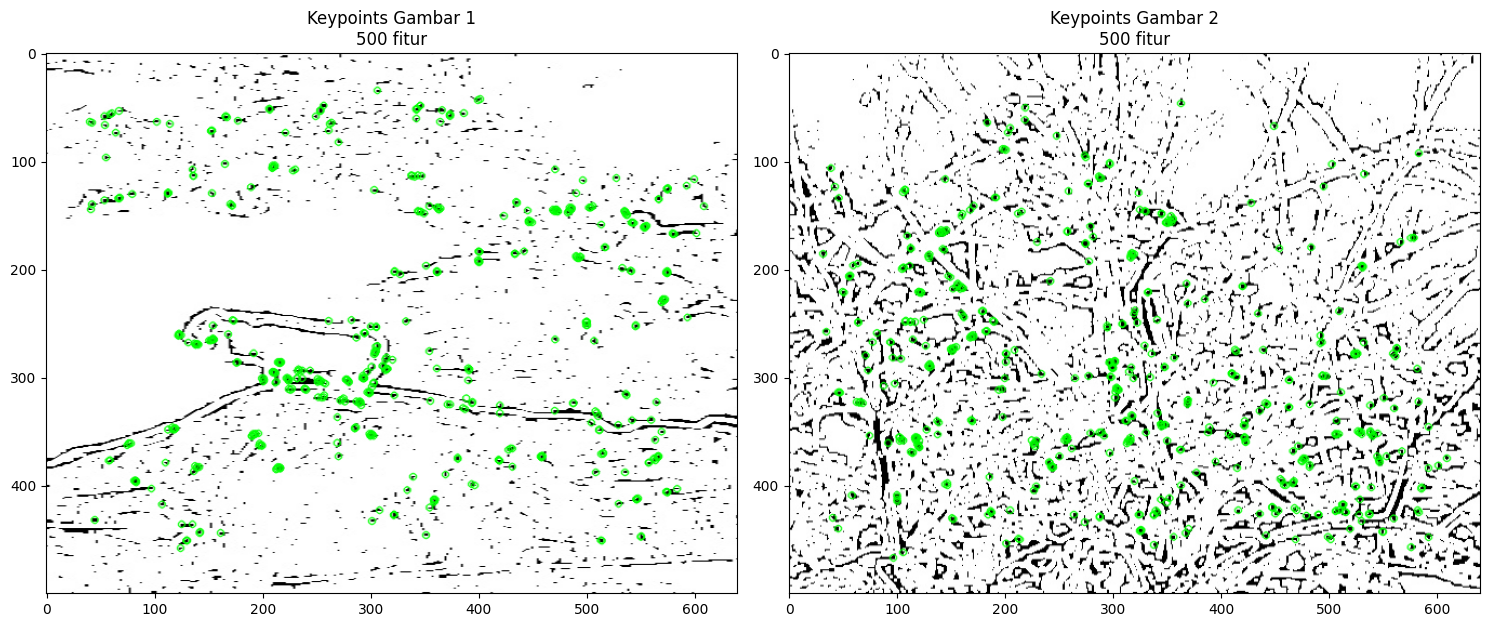

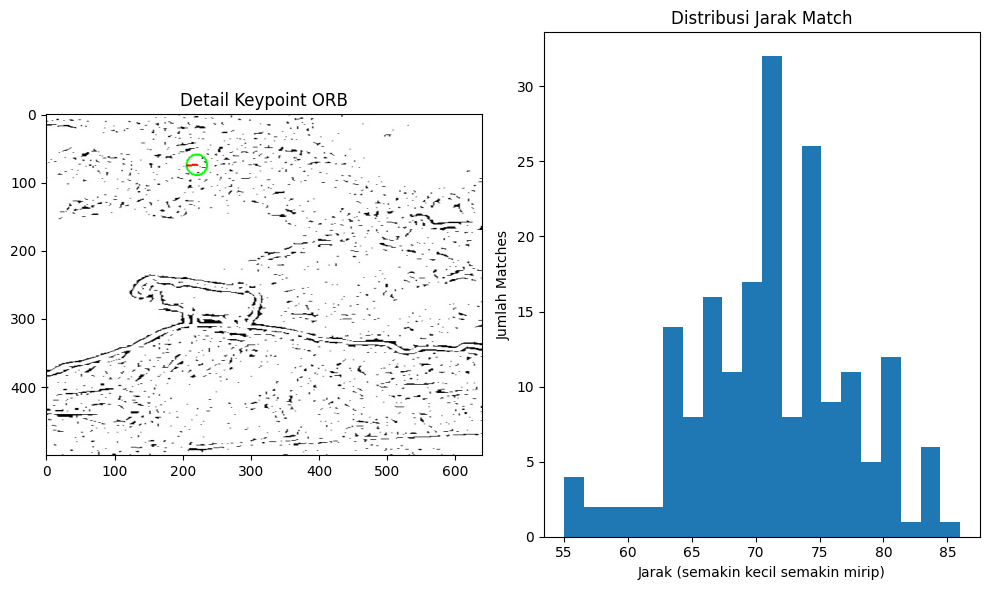


=== KEYPOINTS GAMBAR 1 (5 Contoh) ===
Jumlah Keypoints: 500
Keypoint 1: Pos=(221.0,74.0), Size=31.0, Angle=173.2°
Keypoint 2: Pos=(64.0,74.0), Size=31.0, Angle=101.7°
Keypoint 3: Pos=(303.0,279.0), Size=31.0, Angle=196.8°
Keypoint 4: Pos=(177.0,63.0), Size=31.0, Angle=36.8°
Keypoint 5: Pos=(396.0,400.0), Size=31.0, Angle=352.4°

=== KEYPOINTS GAMBAR 2 (5 Contoh) ===
Jumlah Keypoints: 500
Keypoint 1: Pos=(229.0,175.0), Size=31.0, Angle=140.8°
Keypoint 2: Pos=(112.0,369.0), Size=31.0, Angle=102.5°
Keypoint 3: Pos=(296.0,370.0), Size=31.0, Angle=62.1°
Keypoint 4: Pos=(316.0,291.0), Size=31.0, Angle=222.8°
Keypoint 5: Pos=(362.0,367.0), Size=31.0, Angle=12.6°


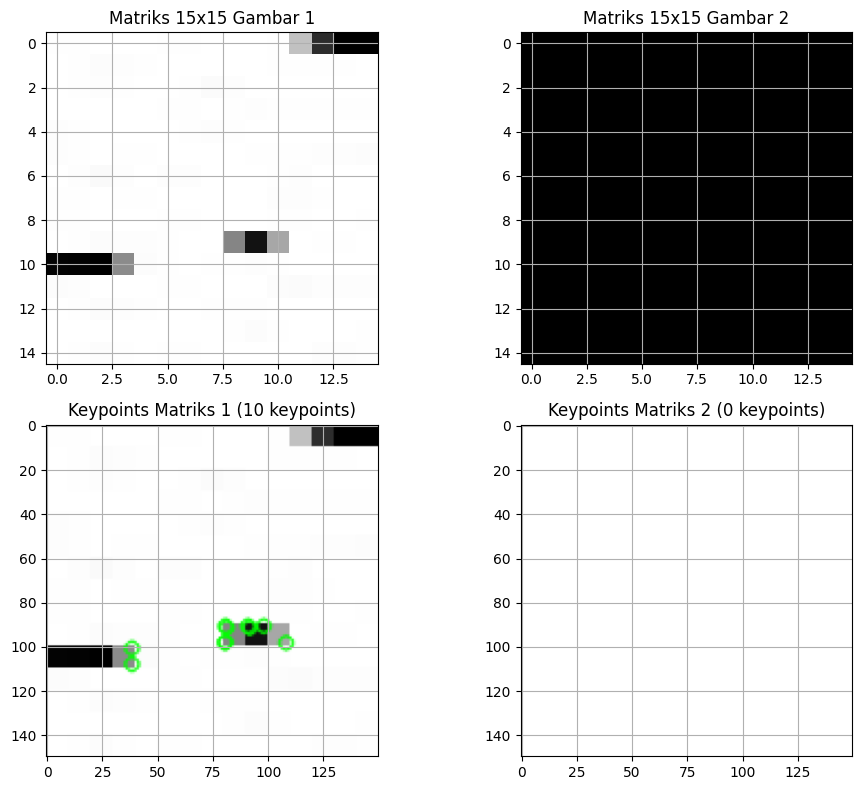


=== PENJELASAN ALGORITMA ORB PADA MATRIKS 15x15 ===
ORB (Oriented FAST and Rotated BRIEF) bekerja dengan 2 langkah utama:
1. Deteksi keypoint dengan FAST (Features from Accelerated Segment Test)
2. Perhitungan descriptor dengan BRIEF (Binary Robust Independent Elementary Features)

TAHAPAN ALGORITMA ORB:
1. FAST Detector mendeteksi titik-titik sudut dengan membandingkan intensitas piksel pusat
   dengan 16 piksel pada lingkaran di sekitarnya. Jika ada 9 piksel berurutan yang
   lebih terang atau lebih gelap dari piksel pusat, maka titik tersebut adalah corner.

2. Orientasi titik sudut dihitung berdasarkan momen intensitas di sekitar titik.

3. BRIEF Descriptor membuat vektor biner 256-bit dengan membandingkan intensitas
   pasangan piksel di sekitar keypoint (dengan rotasi sesuai orientasi).

CONTOH PERHITUNGAN PADA MATRIKS:

Nilai Piksel Matriks 15x15 (Contoh):
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
| 254 | 254 | 255 | 255 | 255 |

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from tabulate import tabulate

## SETUP FOLDER ##
morphology_folder = "/content/val_morphology(erosi,dilasi)"  # Folder hasil morfologi
feature_folder = "/content/val_features"      # Folder untuk hasil deteksi fitur
os.makedirs(feature_folder, exist_ok=True)

## INISIALISASI ORB ##
orb = cv2.ORB_create(nfeatures=500)  # Detektor ORB dengan 500 fitur maksimal

## FUNGSI UTILITY ##
def print_keypoints(kps, title):
    """Mencetak 5 keypoint pertama"""
    print(f"\n=== {title} ===")
    print(f"Jumlah Keypoints: {len(kps)}")
    for i, kp in enumerate(kps[:5]):
        print(f"Keypoint {i+1}: Pos=({kp.pt[0]:.1f},{kp.pt[1]:.1f}), Size={kp.size:.1f}, Angle={kp.angle:.1f}°")

def draw_matches(img1, kp1, img2, kp2, matches):
    """Visualisasi pencocokan fitur"""
    # PERUBAHAN: Pastikan kedua gambar memiliki ukuran sama dengan resize jika perlu
    h1, w1 = img1.shape[:2]
    h2, w2 = img2.shape[:2]

    # Resize jika ukuran berbeda
    if h1 != h2 or w1 != w2:
        # Pilih ukuran yang lebih besar untuk mempertahankan detail
        max_h = max(h1, h2)
        max_w = max(w1, w2)
        # Resize kedua gambar ke ukuran yang sama
        img1_resized = cv2.resize(img1, (max_w, max_h))
        img2_resized = cv2.resize(img2, (max_w, max_h))
    else:
        img1_resized = img1
        img2_resized = img2

    # PERUBAHAN: Gunakan flag yang berbeda untuk menggambar semua matches
    match_img = cv2.drawMatches(
        img1_resized, kp1, img2_resized, kp2, matches[:20], None,
        flags=cv2.DRAW_MATCHES_FLAGS_DEFAULT  # Flag yang lebih sederhana
    )

    plt.figure(figsize=(15, 8))
    plt.imshow(match_img)
    plt.title("Hasil Pencocokan Fitur (20 Terbaik)")
    plt.axis('off')
    plt.show()

    return match_img

## PROSES UTAMA ##
# Ambil 2 gambar contoh dari hasil morfologi
image_files = sorted([f for f in os.listdir(morphology_folder) if f.startswith('dilated_')])[:2]

if len(image_files) >= 2:
    # Baca gambar
    img1 = cv2.imread(os.path.join(morphology_folder, image_files[0]), cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(os.path.join(morphology_folder, image_files[1]), cv2.IMREAD_GRAYSCALE)

    # PERUBAHAN: Pastikan kedua gambar memiliki ukuran yang sama
    # Cek ukuran gambar
    if img1.shape != img2.shape:
        print(f"Ukuran gambar berbeda: {img1.shape} vs {img2.shape}")
        print("Melakukan resize gambar untuk keseragaman...")
        # Resize gambar ke ukuran terbesar
        max_h = max(img1.shape[0], img2.shape[0])
        max_w = max(img1.shape[1], img2.shape[1])
        img1 = cv2.resize(img1, (max_w, max_h))
        img2 = cv2.resize(img2, (max_w, max_h))

    # 1. Deteksi Fitur ORB
    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)

    # Simpan gambar dengan keypoints
    img1_kp = cv2.drawKeypoints(img1, kp1, None, color=(0,255,0))
    img2_kp = cv2.drawKeypoints(img2, kp2, None, color=(0,255,0))
    cv2.imwrite(os.path.join(feature_folder, "orb_kp1.jpg"), img1_kp)
    cv2.imwrite(os.path.join(feature_folder, "orb_kp2.jpg"), img2_kp)

    # 2. Pencocokan Fitur dengan Brute-Force Matcher
    # PERUBAHAN: Cek apakah descriptor ada
    if des1 is not None and des2 is not None and len(kp1) > 0 and len(kp2) > 0:
        # PERUBAHAN: Tambahkan error handling untuk descriptor dengan tipe berbeda
        try:
            bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
            matches = bf.match(des1, des2)
            matches = sorted(matches, key=lambda x: x.distance)  # Urutkan berdasarkan jarak

            # Simpan hasil pencocokan
            match_img = draw_matches(img1, kp1, img2, kp2, matches)
            cv2.imwrite(os.path.join(feature_folder, "orb_matches.jpg"), match_img)

            # Info Matches
            print("\n=== INFO Pencocokan ===")
            print(f"Total Match: {len(matches)}")
            print("5 Match Terbaik:")
            for i, m in enumerate(matches[:5]):
                print(f"Match {i+1}: Distance={m.distance}, Idx1={m.queryIdx}, Idx2={m.trainIdx}")
        except Exception as e:
            print(f"Error saat melakukan pencocokan: {e}")
            matches = []
    else:
        print("⚠️ Tidak cukup keypoints terdeteksi untuk pencocokan")
        matches = []

    # 3. Analisis pada Matriks 15x15
    sample_matrix1 = img1[:15, :15]
    sample_matrix2 = img2[:15, :15]

    # PERUBAHAN: Tambahkan cek ukuran matriks
    if sample_matrix1.shape[0] < 15 or sample_matrix1.shape[1] < 15:
        sample_matrix1 = cv2.resize(img1, (15, 15))
    if sample_matrix2.shape[0] < 15 or sample_matrix2.shape[1] < 15:
        sample_matrix2 = cv2.resize(img2, (15, 15))

    # Deteksi ORB pada matriks kecil (diperbesar 10x agar ORB bisa bekerja)
    sample_large1 = cv2.resize(sample_matrix1, (150,150), interpolation=cv2.INTER_NEAREST)
    sample_large2 = cv2.resize(sample_matrix2, (150,150), interpolation=cv2.INTER_NEAREST)

    kp_small1, des_small1 = orb.detectAndCompute(sample_large1, None)
    kp_small2, des_small2 = orb.detectAndCompute(sample_large2, None)

    # TAMBAHAN: Tampilkan jumlah keypoints pada matriks kecil yang diperbesar
    print(f"\nKeypoints pada matriks 15x15 diperbesar untuk Gambar 1: {len(kp_small1) if kp_small1 else 0}")
    print(f"Keypoints pada matriks 15x15 diperbesar untuk Gambar 2: {len(kp_small2) if kp_small2 else 0}")

    # Visualisasi
    plt.figure(figsize=(15, 6))
    plt.subplot(1,2,1), plt.imshow(img1_kp), plt.title(f"Keypoints Gambar 1\n{len(kp1)} fitur")
    plt.subplot(1,2,2), plt.imshow(img2_kp), plt.title(f"Keypoints Gambar 2\n{len(kp2)} fitur")
    plt.tight_layout()
    plt.show()

    # TAMBAHAN: Visualisasi struktur ORB keypoint
    # Visualisasi struktur keypoint ORB
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)

    # Gambar contoh dengan keypoint yang lebih besar untuk kejelasan
    if len(kp1) > 0:
        # Ambil satu keypoint untuk visualisasi detail
        kp = kp1[0]
        # Buat visualisasi khusus
        x, y = int(kp.pt[0]), int(kp.pt[1])
        size = int(kp.size / 2)
        angle = kp.angle * np.pi / 180  # Convert to radians

        # Buat salinan gambar untuk visualisasi
        vis_img = img1.copy()
        if len(vis_img.shape) == 2:  # Gambar grayscale
            vis_img = cv2.cvtColor(vis_img, cv2.COLOR_GRAY2BGR)

        # Gambar lingkaran untuk ukuran
        cv2.circle(vis_img, (x, y), size, (0, 255, 0), 2)

        # Gambar garis untuk orientasi
        end_x = int(x + size * np.cos(angle))
        end_y = int(y + size * np.sin(angle))
        cv2.line(vis_img, (x, y), (end_x, end_y), (0, 0, 255), 2)

        plt.imshow(cv2.cvtColor(vis_img, cv2.COLOR_BGR2RGB))
        plt.title("Detail Keypoint ORB")
    else:
        plt.imshow(img1, cmap='gray')
        plt.title("Tidak ada keypoint terdeteksi")

    # Visualisasi hubungan antara matches
    plt.subplot(1, 2, 2)
    if len(matches) > 0:
        # Visualisasi jarak matches
        match_distances = [m.distance for m in matches]
        plt.hist(match_distances, bins=20)
        plt.title("Distribusi Jarak Match")
        plt.xlabel("Jarak (semakin kecil semakin mirip)")
        plt.ylabel("Jumlah Matches")
    else:
        plt.text(0.5, 0.5, "Tidak ada matches", ha='center', va='center', fontsize=14)
        plt.title("Tidak ada data matches")
    plt.tight_layout()
    plt.show()

    # Info Keypoints
    print_keypoints(kp1, "KEYPOINTS GAMBAR 1 (5 Contoh)")
    print_keypoints(kp2, "KEYPOINTS GAMBAR 2 (5 Contoh)")

    # PERUBAHAN: Perbaiki visualisasi matriks 15x15
    # Visualisasi Matriks 15x15
    fig, ax = plt.subplots(2, 2, figsize=(10,8))
    ax[0,0].imshow(sample_matrix1, cmap='gray')
    ax[0,0].set_title("Matriks 15x15 Gambar 1")
    ax[0,0].grid(True)

    ax[0,1].imshow(sample_matrix2, cmap='gray')
    ax[0,1].set_title("Matriks 15x15 Gambar 2")
    ax[0,1].grid(True)

    # Gambar keypoints pada sample yang diperbesar
    sample_kp1_img = cv2.drawKeypoints(sample_large1, kp_small1, None, color=(0,255,0))
    sample_kp2_img = cv2.drawKeypoints(sample_large2, kp_small2, None, color=(0,255,0))

    ax[1,0].imshow(cv2.cvtColor(sample_kp1_img, cv2.COLOR_BGR2RGB))
    ax[1,0].set_title(f"Keypoints Matriks 1 ({len(kp_small1) if kp_small1 else 0} keypoints)")
    ax[1,0].grid(True)

    ax[1,1].imshow(cv2.cvtColor(sample_kp2_img, cv2.COLOR_BGR2RGB))
    ax[1,1].set_title(f"Keypoints Matriks 2 ({len(kp_small2) if kp_small2 else 0} keypoints)")
    ax[1,1].grid(True)

    plt.tight_layout()
    plt.show()

    # TAMBAHAN: Visualisasi cara kerja ORB pada 15x15 matriks
    print("\n=== PENJELASAN ALGORITMA ORB PADA MATRIKS 15x15 ===")
    print("ORB (Oriented FAST and Rotated BRIEF) bekerja dengan 2 langkah utama:")
    print("1. Deteksi keypoint dengan FAST (Features from Accelerated Segment Test)")
    print("2. Perhitungan descriptor dengan BRIEF (Binary Robust Independent Elementary Features)")

    # TAMBAHAN: Penjelasan step-by-step deteksi ORB pada matriks kecil
    if sample_matrix1.size > 0:
        print("\nTAHAPAN ALGORITMA ORB:")
        print("1. FAST Detector mendeteksi titik-titik sudut dengan membandingkan intensitas piksel pusat")
        print("   dengan 16 piksel pada lingkaran di sekitarnya. Jika ada 9 piksel berurutan yang")
        print("   lebih terang atau lebih gelap dari piksel pusat, maka titik tersebut adalah corner.")

        print("\n2. Orientasi titik sudut dihitung berdasarkan momen intensitas di sekitar titik.")

        print("\n3. BRIEF Descriptor membuat vektor biner 256-bit dengan membandingkan intensitas")
        print("   pasangan piksel di sekitar keypoint (dengan rotasi sesuai orientasi).")

        # Detail perhitungan contoh
        print("\nCONTOH PERHITUNGAN PADA MATRIKS:")
        # Visualisasi matriks 15x15 dengan nilai piksel
        print("\nNilai Piksel Matriks 15x15 (Contoh):")
        print(tabulate(sample_matrix1, tablefmt="grid", stralign="center"))

    print("\n✅ Proses selesai! Hasil disimpan di:", feature_folder)
else:
    print("⚠️ Tidak cukup gambar untuk diproses (minimal 2 gambar)")

In [ ]:
import os
import shutil
import glob

destination_folder = "/content/val_all_results"
os.makedirs(destination_folder, exist_ok=True)

source_folders = [
    "/content/val2014_processed",
    "/content/val_edge",
    "/content/val_features",
    "/content/val_harris",
    "/content/val_median",
    "/content/val_morphology(erosi,dilasi)",
    "/content/val_prewitt",
    "/content/val_skeleton"
]

total_files = 0

for folder in source_folders:
    folder_name = os.path.basename(folder)
    subfolder_path = os.path.join(destination_folder, folder_name)
    os.makedirs(subfolder_path, exist_ok=True)

    files = glob.glob(os.path.join(folder, "*.*"))

    for file_path in files:
        file_name = os.path.basename(file_path)
        destination_path = os.path.join(subfolder_path, file_name)

        shutil.copy2(file_path, destination_path)

    total_files += len(files)
    print(f"Copied {len(files)} files from {folder_name}")

standalone_folder = os.path.join(destination_folder, "misc_files")
os.makedirs(standalone_folder, exist_ok=True)

standalone_files = [
    "/content/edge_heatmap.png",
    "/content/kernel_operation_7_7.png",
    "/content/prewitt_visualization.png"
]

for file_path in standalone_files:
    if os.path.exists(file_path):
        file_name = os.path.basename(file_path)
        destination_path = os.path.join(standalone_folder, file_name)
        shutil.copy2(file_path, destination_path)
        total_files += 1
        print(f"Copied standalone file: {file_name}")

print(f"\nAll {total_files} files consolidated into: {destination_folder}")

Copied 50 files from val2014_processed
Copied 50 files from val_edge
Copied 10 files from val_features
Copied 50 files from val_harris
Copied 50 files from val_median
Copied 100 files from val_morphology(erosi,dilasi)
Copied 50 files from val_prewitt
Copied 50 files from val_skeleton

All 410 files consolidated into: /content/val_all_results


In [ ]:
import shutil
import os
from google.colab import files

folder_path = "/content/val_all_results"

zip_path = "/content/val_all_results.zip"
shutil.make_archive(
    os.path.splitext(zip_path)[0],
    'zip',
    folder_path
)

files.download(zip_path)

print(f"✅ Folder '{folder_path}' has been zipped and download should begin automatically.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Folder '/content/val_all_results' has been zipped and download should begin automatically.
